In [3]:
!pip install gradio


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/50.6 kB ? eta -:--:--
     ---------------------------------------- 50.6/50.6 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.6 kB ? eta -:--:--
     ---------------------------------------- 65.6/65.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/45.7 kB ? eta -:--:--
     ---------------------------------------- 45.7/45.7 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/45.9 kB ? eta -:--:--
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 0.0/124.7 kB ? eta -:--:--
     -------------------------------------- 124.7/124.7 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/55.8 kB ? eta -:--:--
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 

(230,)
(230,)
(200,)
The folder  ' Data/EDB0714/Mix ' exits, Please check!
(230, 1)
(230, 3)
The folder  ' Data/TNM0961/Mix ' exits, Please check!
(230, 1)
(230, 3)
The folder  ' Data/HXL0968/Mix ' exits, Please check!
(200, 1)
(200, 3)
The folder  ' Data/Mix ' exits, Please check!
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


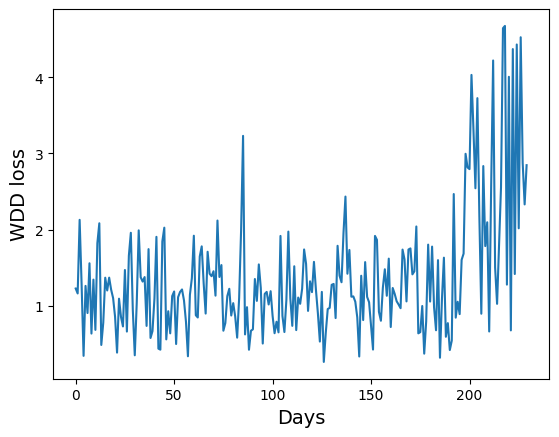

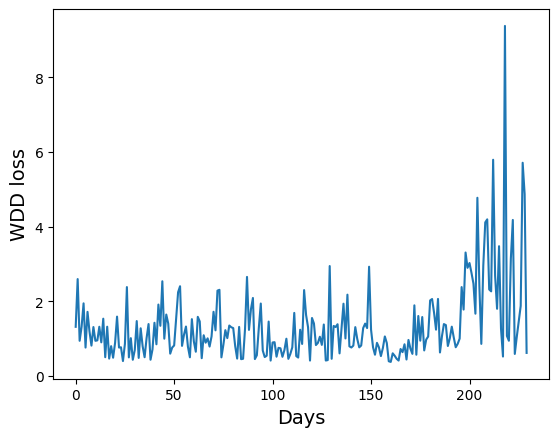

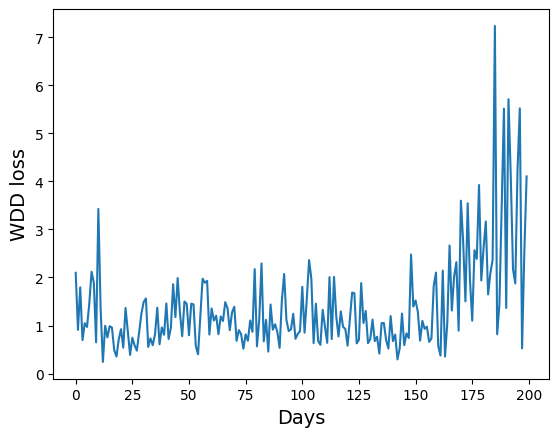

In [9]:
import numpy as np
import linecache
import matplotlib.pyplot as plt
import os
import gradio as gr
# from FeatureExtract import path_check


def path_check(path):
    '''
    Check the input path
    '''
    folders=os.path.exists(path)
    if not folders:
        print("Create new folders: ' %s ' successfully!"%(path))
        os.makedirs(path)
    else:
        print("The folder  ' %s ' exits, Please check!"%(path))
        pass
        # os._exit(0)

def role_feature():
    file_name='/feature/data_out.csv'    
    user_sets=['ASD0577', 'AAL0706', 'ASM0575', 'GCG0951', 'AAV0450', 'TDG0962', 'CCM0136', 'FRR0832', 'KPP0452', 'ABM0845', 'MJB0588', 'WJD0576', 'ILH0958', 'FEB0306', 'JJB0700', 'AHD0848', 'LDM0587', 'MLG0475', 'NCK0295', 'YJV0699',]
    All_users_features=np.zeros((37))
    for username in user_sets:
        path=username+file_name
        All_features=np.loadtxt(path,delimiter=',')
        Nums=len(All_features)
        Aver_features=np.zeros((37))
        # print(np.shape(Aver_features))
        for matrix in All_features:
            Aver_features=Aver_features+matrix
        Aver_features=Aver_features/Nums
        All_users_features=All_users_features+Aver_features
            # print (np.shape(matrix))
    role_features=All_users_features/len(user_sets)
    role_features=np.reshape(role_features,(1,37))
    np.savetxt('Role_feature.csv',role_features,delimiter=',',fmt='%f')

def deviations_for_users(username):
    '''
    Calculate the  deviations between user's daily feature and role feature.
    '''

    # username='EDB0714'
    file_name='/feature/label_all.csv'
    role_feature_file='Data/'+ 'Role_feature.csv'
    Role_features=np.loadtxt(role_feature_file,delimiter=',')
    user_features=np.loadtxt('Data/'+ username+file_name,delimiter=',')
    All_loss=[]
    for matrix in user_features:
        paras=np.array([1.2,1,0.2,0,0,0,0,1,0.1,1.2,\
                        2,1,1.5,\
                        0.5,1,1,0.5,0.1,0.7,\
                        0.5,1,1,0.5,0.1,0.7,\
                        0.5,1,1,0.5,0.1,0.7,\
                        0.5,1,1,0.5,0.1,0.7])
        deviations=np.square(np.multiply((Role_features-matrix),paras))
        deviations=deviations.sum()/37
        All_loss.append(deviations)
    np.savetxt('Data/'+ username+'/Model/Role_loss.csv',All_loss,delimiter=',',fmt='%f')
    x_list=range(0,len(user_features))
    print(np.shape(All_loss))
    plt.figure()
    plt.plot(x_list,All_loss)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('WDD loss',fontsize=14)
    # plt.show()
    plt.savefig('Data/'+ username+'/Model/Role_features.jpg')

def count_line(files_in):
    file_open=open(files_in,'r')
    count=0
    for line in file_open:
        count+=1
    file_open.close()
    return count   




# use the code below step by step.
if __name__ == "__main__":

    # ------ Calculate the role feature ---------
    # role_feature() 
    user_sets=['EDB0714','TNM0961','HXL0968']
    # ----- step 1  每个用户单独计算 role features 
    for user in user_sets:
        deviations_for_users(user)
    # ------------------------------------
    # ------ step 2 每个用户的各种偏差度进行拼接 (mix data)------
    for username in user_sets:
        user_path='Data/'+ username+'/Mix'
        path_check(user_path)
        file_feature='/feature/myloss_all.csv'
        file_sequence='/sequence/loss_all.csv'
        file_role='/Model/Role_loss.csv'
        file_save=user_path+'/Mix_loss.csv'
        # 加载各个特征的loss
        feature_loss=np.loadtxt('Data/'+ username+file_feature,delimiter=',')
        feature_loss=np.reshape(feature_loss,(len(feature_loss),1))
        sequence_loss=np.loadtxt('Data/'+ username+file_sequence,delimiter=',')
        sequence_loss=np.reshape(sequence_loss,(len(sequence_loss),1))
        role_loss=np.loadtxt('Data/'+ username+file_role,delimiter=',')
        role_loss=np.reshape(role_loss,(len(role_loss),1))
        mix_loss=np.concatenate((feature_loss,sequence_loss,role_loss),axis=1)
        np.savetxt(file_save,mix_loss,delimiter=',',fmt='%f')
        print(np.shape(role_loss))
        print(np.shape(mix_loss))
    # ----- step 3 拼接的数据进行标签 (然后根据CERT数据集中的恶意行为进行标签的修正) Generate the label according to the source data
    # -------  the number behind the user is the firt day that the users' anomalous behavior is emerging accoriding to the source data in CERT dataset ------------
    user_sets={'EDB0714':198,'TNM0961':198,'HXL0968':165} 
    for username,nums in user_sets.items():
            user_path='Data/'+ username+'/Mix'
            file_save=user_path+'/label_loss.csv'
            file_read=user_path+'/Mix_loss.csv'
            Num_lines=count_line(file_read)
            fileopen=open(file_save,'wt')
            index=0
            while index<Num_lines:
                if index<nums-1:
                    fileopen.writelines('0,1\n')
                else:
                    fileopen.writelines('1,0\n')
                index=index+1
            fileopen.close()
    # -------- step 4 进行各个用户数据的混合：(mix all data) --------

mix_path = 'Data/Mix'
path_check(mix_path)
file_save = open(mix_path + '/Mix_all_loss.csv', 'wt')
label_save = open(mix_path + '/Mix_all_label.csv', 'wt')

for username in user_sets:
    user_path = 'Data/' + username + '/Mix'
    mix_loss_file = user_path + '/Mix_loss.csv'
    mix_label_file = user_path + '/label_loss.csv'

    with open(mix_loss_file, 'r') as loss_open, open(mix_label_file, 'r') as label_open:
        for line in loss_open:
            file_save.writelines(line)

        for line in label_open:
            label_save.writelines(line)

file_save.close()
label_save.close()







    # exit(0)


def plot_wdd_loss(username):
    file_path = f'Data/{username}/Model/Role_loss.csv'
    wdd_loss = np.loadtxt(file_path, delimiter=',')

    x_list = range(0, len(wdd_loss))
    plt.figure()
    plt.plot(x_list, wdd_loss)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('WDD loss', fontsize=14)

    # Save the plot to a file
    plot_file_path = f'Data/{username}/Model/Role_features.jpg'
    plt.savefig(plot_file_path)

    # Close the plot to prevent it from displaying in the Gradio interface
    plt.close()

    return plot_file_path

# ... (the rest of your code)


def visualize_wdd_loss(username):
    plot_file_path = plot_wdd_loss(username)
    return gr.Image(plot_file_path)

iface = gr.Interface(
    fn=visualize_wdd_loss,
    inputs='text',
    outputs='image',
    live=True,
    title='WDD Loss Visualization',
)




iface.launch()


In [5]:
pip install --upgrade gradio


Note: you may need to restart the kernel to use updated packages.
